In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  #默认为'last'
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


## 数据分析及可视化

### 数据来源介绍
本数据集由和鲸（Kesci）竞赛平台提供，选自UCI机器学习库中的【银行营销数据集（Bank Marketing Data Set）】
> [数据来源](https://www.kesci.com/home/competition/5c234c6626ba91002bfdfdd3/content/1)

这些数据与**葡萄牙**银行机构的营销活动相关。这些营销活动以电话为基础，银行客服人员需要联系客户来确认客户是否将购买这个银行的产品（定期存款产品）

本文首先将通过可视化的方式简单分析数据的各种情况



### 数据总体分析

首先导入相关工具包，使用的工具包有`Numpy`,`pandas`,`seaborn`和`matplotlib`。`Numpy`,`pandas`主要用来读取、筛选和处理数据,`seaborn`和`matplotlib`用来完成数据的可视化

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from collections import Counter

In [3]:
#读入数据
data = pd.read_csv("./train_set.csv")
data = pd.DataFrame(data)

In [4]:
print(f'这个数据集的大小为{data.shape}')
data.info()

这个数据集的大小为(25317, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


首先通过`data.info`可以简单了解数据集的信息，比如数据集的尺寸，数据集占用的内存大小，每个特征的属性包括名字和数值类型等。具体的字段说明见下图
![字段说明](./statement.jpg)

+ 可以发现，这个数据集一共有25317条数据，每条数据包含18个特征，每条数据都不存在缺失值
+ 原本为String字段的数值，通过pandas读取后变成了object类型的格式

In [5]:
data.describe()

ID           age        balance           day      duration  \
count  25317.000000  25317.000000   25317.000000  25317.000000  25317.000000   
mean   12659.000000     40.935379    1357.555082     15.835289    257.732393   
std     7308.532719     10.634289    2999.822811      8.319480    256.975151   
min        1.000000     18.000000   -8019.000000      1.000000      0.000000   
25%     6330.000000     33.000000      73.000000      8.000000    103.000000   
50%    12659.000000     39.000000     448.000000     16.000000    181.000000   
75%    18988.000000     48.000000    1435.000000     21.000000    317.000000   
max    25317.000000     95.000000  102127.000000     31.000000   3881.000000   

           campaign         pdays      previous             y  
count  25317.000000  25317.000000  25317.000000  25317.000000  
mean       2.772050     40.248766      0.591737      0.116957  
std        3.136097    100.213541      2.568313      0.321375  
min        1.000000     -1.000000      0.000000      0.000000  
25%        1.000000     -1.000000      0.000000      0.000000  
50%        2.000000     -1.000000      0.000000      0.000000  
75%        3.000000     -1.000000      0.000000      0.000000  
max       55.000000    854.000000    275.000000      1.000000

通过`describe`函数发现

`balance`,`duration`,和`pdays`的std较大，说明值的分布范围较广，后期可能需要进行处理。年龄从最低18岁到最大95岁，跨度也比较大

<Figure size 1440x720 with 0 Axes>

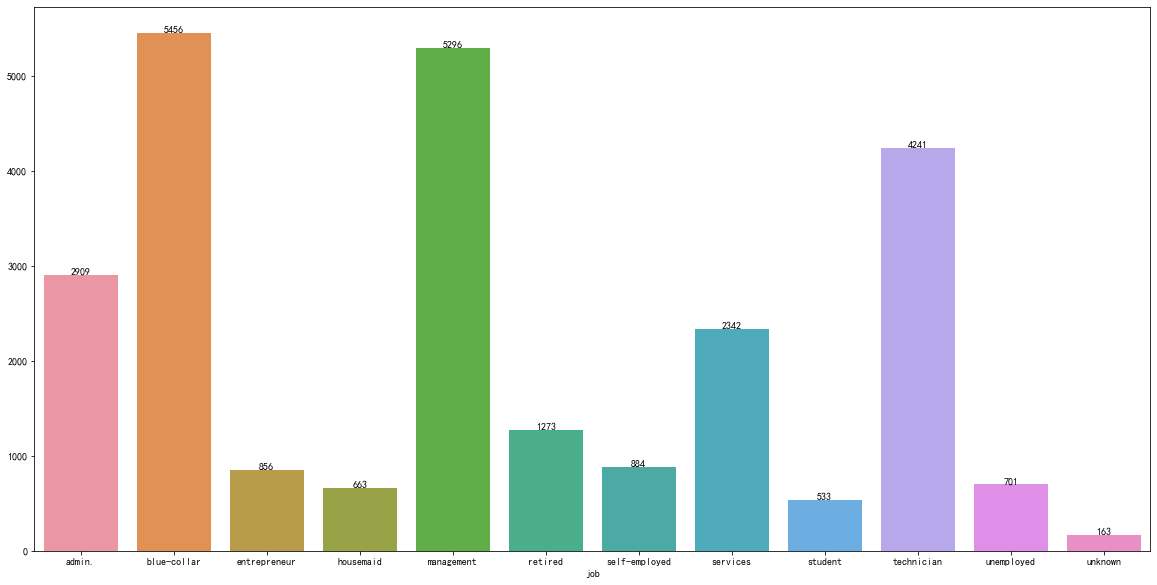

In [6]:
plt.figure(figsize=(20,10))
# sns.barplot("job","y",data=data)
pic = data.groupby("job")["ID"].count()
g = sns.barplot(pic.index,pic.values)
for i in range(len(pic)):
    a = g.text(i,pic[i],pic[i],color="black",ha="center")

In [7]:
plt.figure(figsize=(10,13))
name_list = ["marital","housing","default","education","loan","y"]
for i in range(len(name_list)):
    b = plt.subplot(3,2,i+1)
    pic = data.groupby(name_list[i])["ID"].count()
    g = sns.barplot(pic.index,pic.values)
    for i in range(len(pic)):
        a = g.text(i,pic[i],pic[i],color="black",ha="center")


<Figure size 720x936 with 0 Axes>

统计了样本中职业、教育情况、婚姻、住房贷款、个人贷款、违约记录六个字段的值的分布情况，以下是我从这个样本中了解到的相关信息

+ 大部分人的职业为蓝领、部门经理和技术人员。大部分人都接受了中学及以上的教育。样本中多数人结过婚，有一定的住房贷款和个人贷款，他们大都信用较好，很少有违约的行为。可以了解到这个样本的人群大多是一群教育程度高、有家庭有事业但是受背负一定数量贷款的人群，这群人需要一定的理财产品来管理他们的收入。

+ 最后一个图是这个样本的标签，0表示最终不会购买产品，1表示购买。可以看到这是个不均衡样本，之后再数据预处理的时候要对这种情况做一定的处理。

+ 数据中有大量unknown的样本，在数据预处理的时候需要特殊处理

### 数据特征联系


(<Figure size 560x640 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b92c918908>)

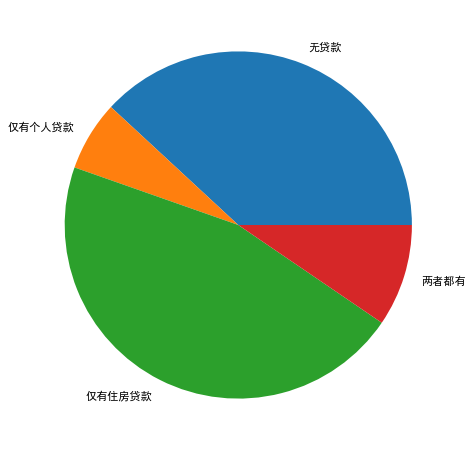

In [8]:
plt.subplots(figsize=(7,8), dpi= 80)
housing_loan = data.loc[:,"housing":"loan"]
housing_loan[housing_loan=="yes"]= 1
housing_loan[housing_loan=="no"]= 0
res = housing_loan.groupby("housing")["loan"].value_counts()
total = len(housing_loan)
neigher = res[0,0]/total
housing = res[1,0]/total
loan = res[0,1]/total
hl = res[1,1]/total
categories=["无贷款","仅有个人贷款","仅有住房贷款","两者都有"]
X = [neigher,loan,housing,hl]
a = plt.pie(X,labels=categories)

有部分人不仅有住房贷款还有个人贷款的压力，在后续做分类的时候这两个特征可能会对结果有影响

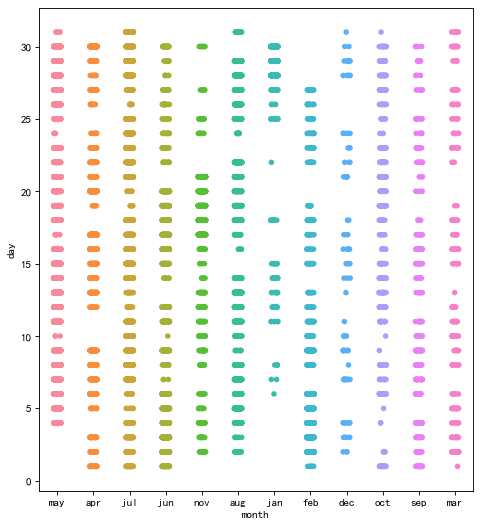

In [9]:
day_month = data.loc[:,"day":"month"]
fig, ax = plt.subplots(figsize=(7,8), dpi= 80)    
sns.stripplot(x="month", y="day",size=5,data=day_month,ax=ax)

上图显示的是最后一次联系某用户的日期，可以看到这个银行几乎全年每天都在联系客户，而节假日像是十二月二十五日圣诞节到一月的假期，几乎没什么数据，可以看到这份数据是真实的

### 与y标签的联系

以上的可视化大概了解了各个特征在所有样本中的分布情况，接下来我会筛选几个特征去寻找与y标签之间的联系，希望挖掘出与购买产品这个结果相关的信息

<Figure size 1008x360 with 0 Axes>

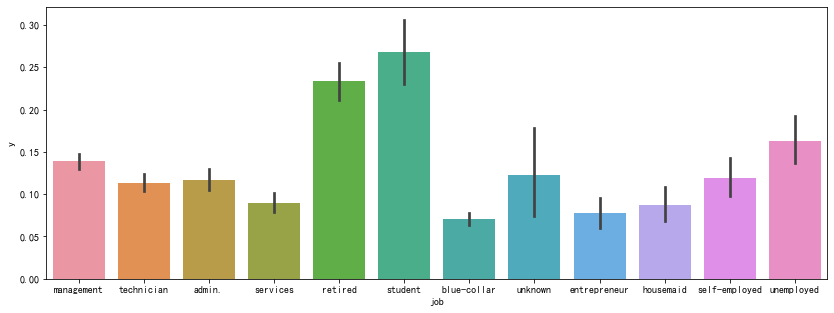

In [10]:
plt.figure(figsize=(14,5))
feature = ["job"]
for i in range(len(feature)):
    sns.barplot(feature[i],"y",data=data)

In [11]:
plt.figure(figsize=(19,7))
feature = ["marital","education","housing","loan","poutcome","default"]
for i in range(len(feature)):
    a = plt.subplot(2,3,i+1)
    c = sns.barplot(feature[i],"y",data=data)

<Figure size 1368x504 with 0 Axes>

上图筛选了职业、婚姻、教育、有无贷款、上次活动结果和违约记录这几个特征后，分析了最终是否会购买产品之间的关联性，得到如下分析：
+ 虽然样本中蓝领、部门经理、技术人员这三种职业最多，但其大部分人最终不会购买产品。反而是退休人员和学生更加可能购买产品
+ 没有负债的人相比有负债的人更加容易购买产品
+ 上一次活动成功的人有很大概率会再次购买产品
+ 受过高等教育的人以及单身人士有相对较高的概率会购买产品

## 数据分类与预测

这个数据来源为和鲸{Kesci}练习赛赛题，除了分析数据特征外，更重要的是需要完成一个分类任务，其目标是预测客户是(' 1 ')或者否(' 0 ')购买该银行的产品。最终需要预测测试数据中样本为1的概率，将结果打包成csv文件上传到平台，平台以AUC为评判标准评判最终结果


### 数据读入与简单处理
分别读入训练数据集合测试是数据及。训练数据集带有标签，而测试数据集不带标签，部分数据展示如下

In [42]:
train_set = pd.read_csv("./train_set.csv")
test_set = pd.read_csv("./test_set.csv")
train_set = pd.DataFrame(train_set)
test_set = pd.DataFrame(test_set)
train_set = train_set.drop(columns="ID")
train_set.head()
test_set.head()

age         job   marital  education default  balance housing loan  \
0   43  management   married   tertiary      no      291     yes   no   
1   42  technician  divorced    primary      no     5076     yes   no   
2   47      admin.   married  secondary      no      104     yes  yes   
3   28  management    single  secondary      no     -994     yes  yes   
4   42  technician  divorced  secondary      no     2974     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0   unknown    9   may       150         2     -1         0  unknown  0  
1  cellular    7   apr        99         1    251         2    other  0  
2  cellular   14   jul        77         2     -1         0  unknown  0  
3  cellular   18   jul       174         2     -1         0  unknown  0  
4   unknown   21   may       187         5     -1         0  unknown  0

ID  age         job  marital  education default  balance housing loan  \
0  25318   51   housemaid  married    unknown      no      174      no   no   
1  25319   32  management  married   tertiary      no     6059     yes   no   
2  25320   60     retired  married    primary      no        0      no   no   
3  25321   32     student   single   tertiary      no       64      no   no   
4  25322   41   housemaid  married  secondary      no        0     yes  yes   

     contact  day month  duration  campaign  pdays  previous poutcome  
0  telephone   29   jul       308         3     -1         0  unknown  
1   cellular   20   nov       110         2     -1         0  unknown  
2  telephone   30   jul       130         3     -1         0  unknown  
3   cellular   30   jun       598         4    105         5  failure  
4   cellular   15   jul       368         4     -1         0  unknown

如前一节分析所讲，这个数据集大部分数据都是离散数据，很多特征的值都是文本的形式，这样的特征无法训练，需要将其编码，具体方式为讲特征的所有可能出现的值转成新的特征，用0或1来表示某一个样本是否具有这个特征，这种方式叫做One-Hot编码。以下是经过One-Hot编码后的数据结果,最终数据集有原来的变为(25317, 18)扩展为(25317, 53)

In [43]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)
train_set = vec.fit_transform(train_set.to_dict(orient="record"))
train_set = pd.DataFrame(train_set)
train_set.columns = vec.feature_names_
train_set.head()
train_set.shape

age  balance  campaign  contact=cellular  contact=telephone  \
0  43.0    291.0       2.0               0.0                0.0   
1  42.0   5076.0       1.0               1.0                0.0   
2  47.0    104.0       2.0               1.0                0.0   
3  28.0   -994.0       2.0               1.0                0.0   
4  42.0   2974.0       5.0               0.0                0.0   

   contact=unknown   day  default=no  default=yes  duration  ...  month=nov  \
0              1.0   9.0         1.0          0.0     150.0  ...        0.0   
1              0.0   7.0         1.0          0.0      99.0  ...        0.0   
2              0.0  14.0         1.0          0.0      77.0  ...        0.0   
3              0.0  18.0         1.0          0.0     174.0  ...        0.0   
4              1.0  21.0         1.0          0.0     187.0  ...        0.0   

   month=oct  month=sep  pdays  poutcome=failure  poutcome=other  \
0        0.0        0.0   -1.0               0.0             0.0   
1        0.0        0.0  251.0               0.0             1.0   
2        0.0        0.0   -1.0               0.0             0.0   
3        0.0        0.0   -1.0               0.0             0.0   
4        0.0        0.0   -1.0               0.0             0.0   

   poutcome=success  poutcome=unknown  previous    y  
0               0.0               1.0       0.0  0.0  
1               0.0               0.0       2.0  0.0  
2               0.0               1.0       0.0  0.0  
3               0.0               1.0       0.0  0.0  
4               0.0               1.0       0.0  0.0  

[5 rows x 52 columns]

(25317, 52)

### 模型选择

常用的分类模型在Sklearn中有很多，如何选择一个合适的模型其实是需要自己不断尝试的，我在前期尝试了很多不同的模型，比如**逻辑回归、KNN、决策树、高斯贝叶斯、神经网络、SVM**还有集成学习的一些模型比如**随机森林、Adaboost**等。我将数据集分成训练集和验证集，采用对不同的模型使用十折交叉验证的方式，筛选出一个较合适的模型，为方便起见，各个模型的参数均使用默认值。

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from tqdm.notebook import tqdm
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [64]:
# 将训练集的一部分拿出来作为测试集,用来最后评判模型在为训练数据上的表现
X = train_set.iloc[:, :-1]
Y = train_set.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.1,
                                                    random_state=33)
x_train.head()

age  balance  campaign  contact=cellular  contact=telephone  \
22236  34.0     97.0       3.0               1.0                0.0   
5153   21.0    557.0       2.0               1.0                0.0   
17452  44.0   1286.0       3.0               0.0                0.0   
1246   26.0    761.0       1.0               1.0                0.0   
8308   36.0    219.0       2.0               1.0                0.0   

       contact=unknown   day  default=no  default=yes  duration  ...  \
22236              0.0  14.0         1.0          0.0      67.0  ...   
5153               0.0  31.0         1.0          0.0     197.0  ...   
17452              1.0  20.0         1.0          0.0     268.0  ...   
1246               0.0   2.0         1.0          0.0     362.0  ...   
8308               0.0  11.0         1.0          0.0     270.0  ...   

       month=may  month=nov  month=oct  month=sep  pdays  poutcome=failure  \
22236        1.0        0.0        0.0        0.0   -1.0               0.0   
5153         0.0        0.0        0.0        0.0   -1.0               0.0   
17452        0.0        0.0        0.0        0.0   -1.0               0.0   
1246         0.0        0.0        0.0        0.0   -1.0               0.0   
8308         1.0        0.0        0.0        0.0  347.0               1.0   

       poutcome=other  poutcome=success  poutcome=unknown  previous  
22236             0.0               0.0               1.0       0.0  
5153              0.0               0.0               1.0       0.0  
17452             0.0               0.0               1.0       0.0  
1246              0.0               0.0               1.0       0.0  
8308              0.0               0.0               0.0       1.0  

[5 rows x 51 columns]

In [67]:
#定义好不同的模型
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['DTC'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models["NN"] = MLPClassifier()
models["RF"] = RandomForestClassifier()
models["AdaBoost"] = AdaBoostClassifier(DecisionTreeClassifier())
models["Bagging"] = BaggingClassifier(DecisionTreeClassifier())
models["Xgboost"] = XGBClassifier()
models['SVM'] = SVC()

In [68]:
#使用十折交叉验证
results = []
num_folds = 10
seed = 7
#使用准确度进行评估
kfold = KFold(n_splits=num_folds, random_state=seed)
for key in tqdm(models):
    #交叉验证每次运行的评分数组
    cv_results = cross_val_score(
        models[key],
        x_train,
        y_train,
        cv=kfold,
    )
    results.append(cv_results)
    print('%s::%f(%f)' % (key, cv_results.mean(), cv_results.std()))


LR::0.902963(0.005162)
LDA::0.901822(0.004328)
KNN::0.880317(0.006124)
DTC::0.872504(0.006043)
NB::0.850296(0.006954)
NN::0.893351(0.003964)
RF::0.899364(0.004568)
AdaBoost::0.874040(0.004680)
Bagging::0.900812(0.005079)
Xgboost::0.906430(0.004832)
SVM::0.882687(0.007327)



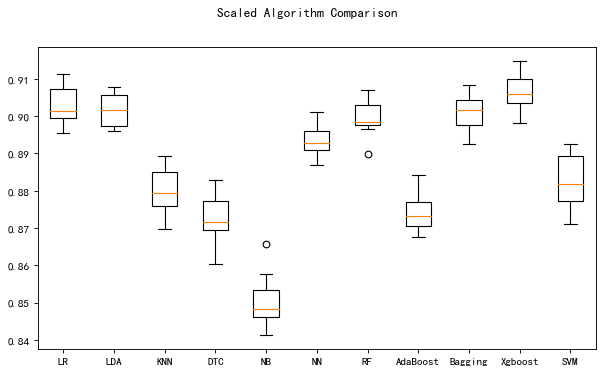

In [74]:
#正态化-箱线图
b = plt.figure(figsize=(9,5),dpi=80)
b = plt.suptitle('Scaled Algorithm Comparison')
b = plt.boxplot(results)
b = plt.xticks(range(1,len(models.keys())+1),models.keys())
b = plt.show()

我一共使用了**逻辑回归、LDA、KNN、决策树、贝叶斯、神经网络、随机森林、Adaboost、Bagging、Xgboost和SVM**共十一种模型，在全部使用默认参数（Adaboost和Bagging的使用的弱分类器为决策树）的情况下，使用十折交叉验证。最后结果显示在这十一种模型中，贝叶斯的效果最不尽如人意，**Xgboost的效果最优**，通过我网上提交成绩的排名显示也是Xgboost模型要优于其他分类模型。我将这个模型作为我的核心模型，使用一定的方式调整参数，使之达到最优的效果

### 网格搜索

关于Xgboost中的网格搜索，主要参考了这篇文章[XGBoost参数调优完全指南](https://blog.csdn.net/han_xiaoyang/article/details/52665396)
> 如果你的预测模型表现得有些不尽如人意，那就用XGBoost吧。XGBoost算法现在已经成为很多数据工程师的重要武器。它是一种十分精致的算法，可以处理各种不规则的数据。
构造一个使用XGBoost的模型十分简单。但是，提高这个模型的表现就有些困难(至少我觉得十分纠结)。这个算法使用了好几个参数。所以为了提高模型的表现，参数的调整十分必要。在解决实际问题的时候，有些问题是很难回答的——你需要调整哪些参数？这些参数要调到什么值，才能达到理想的输出？

我通过网格搜索，主要调整如下几个参数
+ 学习率（learning rate）<=通过交叉验证得到
+ 决策树数量（n_estimators）
+ 决策树相关参数（max_depth,min_child_weight,gamma,subsample,colsample_bytree）
+ 正则化参数（lambda,alpha）<=正则化参数可以降低模型复杂度

In [77]:
from xgboost import plot_importance
from sklearn import metrics

#### n_estimators

In [84]:
def modelfit(alg, X, Y, useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=Y.values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(X, Y, eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:, 1]

    #Print model report:
    print("\nModel Report")
    print("Best Num Of Tree:{}".format(cvresult.shape[0]))
    print("Accuracy : %.4g" %
          metrics.accuracy_score(Y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y, dtrain_predprob))

    feat_imp = pd.Series(
        alg.get_booster().get_fscore()).sort_values(ascending=False)
    b = plt.figure(figsize=(14,5),dpi=80)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

首先我给Xgboost中的各个参数调整一个合适的默认值，其次我定义了一个函数`modelfit`，这个函数会使用xgb自带的交叉验证库调整决策树的数量，根据最后的预测结果，选择一个最优的数量，并且打印`Feature Importances`图，其表示的是数据集中各个特征的重要程度

In [85]:
xgb1 = XGBClassifier(learning_rate=0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
# 得到Best Num Of Tree
modelfit(xgb1, x_train, y_train)


Model Report
Best Num Of Tree:179
Accuracy : 0.9395
AUC Score (Train): 0.967925


得到在学习率为0.1的情况下，最好的数量为179。通过Xgb分析，我了解到对于最后结果影响最大的几个特征为最后一次联系的交流时长和每年账户的平均余额

#### max_depth 和 min_child_weight

接下来使用网格搜索调整`max_depth`和 `min_child_weight`，并打印最佳的参数。为方便展示，网格搜索的其余信息我存在了txt文件中

In [87]:
param_test1 = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=5,
                                                min_child_weight=2,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test1,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch1.fit(x_train, y_train)
res1 = gsearch1.cv_results_
res2 = gsearch1.best_params_
res3 = gsearch1.best_score_
print(res2)
with open("./max_depth_min_child_weight.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=2,
                                     missing=None, n_estimators=186, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, retur

{'max_depth': 5, 'min_child_weight': 3}


3243

得到最优的结果为`max_depth`: 5，`min_child_weight`: 3。进一步在5和3的附近寻找最优的参数

In [88]:
param_test2 = {'max_depth': [5, 6, 7, 8], 'min_child_weight': [2, 3, 4, 5]}
gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=179,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test2,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)
gsearch2.fit(x_train, y_train)
res1 = gsearch2.cv_results_
res2 = gsearch2.best_params_
res3 = gsearch2.best_score_
print(res2)
with open("./max_depth_min_child_weight.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=3,
                                     missing=None, n_estimators=179, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_child_weight': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

{'max_depth': 5, 'min_child_weight': 3}


4112

网格搜索结果仍然为5和3，那么就确定`max_depth`的值为5,`min_child_weight`为3

#### gamma

同理，带入上面已经确定的参数，来确定gamma的值

In [93]:
param_test3 = {'gamma': [i / 10.0 for i in range(0, 5)]}
gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=179,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test3,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch3.fit(x_train, y_train)
res1 = gsearch3.cv_results_
res2 = gsearch3.best_params_
res3 = gsearch3.best_score_
print(res2)
with open("./gamma.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=3,
                                     missing=None, n_estimators=179, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', ve

{'gamma': 0.3}


1350

确认`gamma`值为0.3

#### subsample和colsample_bytree

In [94]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=186,
                                                max_depth=6,
                                                min_child_weight=6,
                                                gamma=0.3,
                                                subsample=0.8,
                                                colsample_bytree=0.9,
                                                objective='binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27),
                        param_grid=param_test4,
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch4.fit(x_train, y_train)

res1 = gsearch4.cv_results_
res2 = gsearch4.best_params_
res3 = gsearch4.best_score_
print(res2)
with open("./subsample_colsample_bytree.txt", "w") as f:
    ans = "grid_scores_:" + str(res1) + "\n best_params_:" + str(
        res2) + "\n best_score_:" + str(res3)
    f.write(ans)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=6, min_child_weight=6,
                                     missing=None, n_estimators=186, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refi

{'colsample_bytree': 0.8, 'subsample': 0.9}


4282

最终确定为：`colsample_bytree`为0.8 `subsample`为0.9

#### Learning Rate
前面的参数基本都调完了就轮到学习率了，将xbg模型的参数换上刚才调好的，将学习率减小，并增加决策树的数量，重新做交叉验证，寻找一个最合适的树的数量

In [95]:
xgb1 = XGBClassifier(learning_rate=0.01,
                     n_estimators=2000,
                     max_depth=6,
                     min_child_weight=6,
                     gamma=0.3,
                     subsample=0.9,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
# 得到Best Num Of Tree
modelfit(xgb1, x_train, y_train)


Model Report
Best Num Of Tree:1605
Accuracy : 0.9381
AUC Score (Train): 0.968239


最终得到的树的数量为1650

In [96]:
xgb1 = XGBClassifier(learning_rate=0.01,
                     n_estimators=1605,
                     max_depth=6,
                     min_child_weight=6,
                     gamma=0.3,
                     subsample=0.9,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
xgb1.fit(x_train, y_train)
xgb1.score(x_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=None, n_estimators=1605, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.9, verbosity=1)

0.910347551342812

至此我的xgboost模型已经调完，在测试集的预测结果为91%左右。直接可以用此模型去预测结果了，最终结果为0.93473540，但排名一般，排在280+/745
![排名](res_xgboost.jpg)

## 特征工程提分

300多的排名总是不让人满意，查资料的时候了解到特征工程相关的知识
> 有这么一句话在业界广泛流传，数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取特征以供算法和模型使用。

> [手把手教你用sklearn做特征工程](https://blog.csdn.net/fuqiuai/article/details/79496005)

### 分离连续特征和离散特征

In [117]:
train_set = pd.read_csv("./train_set.csv")
train_set = pd.DataFrame(train_set)

test_set = pd.read_csv("./test_set.csv")
test_set = pd.DataFrame(test_set)

data = pd.concat([train_set,test_set])
data.head()

ID  age  balance  campaign   contact  day default  duration  education  \
0   1   43      291         2   unknown    9      no       150   tertiary   
1   2   42     5076         1  cellular    7      no        99    primary   
2   3   47      104         2  cellular   14      no        77  secondary   
3   4   28     -994         2  cellular   18      no       174  secondary   
4   5   42     2974         5   unknown   21      no       187  secondary   

  housing         job loan   marital month  pdays poutcome  previous    y  
0     yes  management   no   married   may     -1  unknown         0  0.0  
1     yes  technician   no  divorced   apr    251    other         2  0.0  
2     yes      admin.  yes   married   jul     -1  unknown         0  0.0  
3     yes  management  yes    single   jul     -1  unknown         0  0.0  
4     yes  technician   no  divorced   may     -1  unknown         0  0.0

In [119]:
feature=data.columns.tolist()
feature.remove('ID')
feature.remove('y')
#离散值和连续值分开处理
sparse_feature= ['campaign','contact','default','education','housing','job','loan','marital','month','poutcome']
dense_feature=list(set(feature)-set(sparse_feature))
sparse_feature
dense_feature

['campaign',
 'contact',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome']

['age', 'pdays', 'day', 'balance', 'duration', 'previous']

### 离散特征和时间一起统计

In [120]:
def feature_count(data, features):
    feature_name = 'count'
    for i in features:
        feature_name += '_' + i
    temp = data.groupby(features).size().reset_index().rename(columns={0: feature_name})
    data = data.merge(temp, 'left', on=features)
    return data,feature_name

In [121]:
ll=[]
# 离散特征和时间一起统计
for f in['campaign', 'contact','default','education','housing','job','loan','marital','poutcome']:
    data,_=feature_count(data,['day','month',f])
    ll.append(_)
data.head()

ID  age  balance  campaign   contact  day default  duration  education  \
0   1   43      291         2   unknown    9      no       150   tertiary   
1   2   42     5076         1  cellular    7      no        99    primary   
2   3   47      104         2  cellular   14      no        77  secondary   
3   4   28     -994         2  cellular   18      no       174  secondary   
4   5   42     2974         5   unknown   21      no       187  secondary   

  housing  ...    y count_day_month_campaign count_day_month_contact  \
0     yes  ...  0.0                      112                     338   
1     yes  ...  0.0                       41                      68   
2     yes  ...  0.0                       78                     204   
3     yes  ...  0.0                       49                     194   
4     yes  ...  0.0                       15                     357   

  count_day_month_default  count_day_month_education count_day_month_housing  \
0                     326                         67                     303   
1                      71                          9                      54   
2                     230                        147                     138   
3                     194                        110                     130   
4                     361                        213                     326   

   count_day_month_job  count_day_month_loan  count_day_month_marital  \
0                   46                   292                      180   
1                   12                    62                        9   
2                   30                    64                      166   
3                   60                    72                       53   
4                   63                   313                       24   

   count_day_month_poutcome  
0                       338  
1                         7  
2                       235  
3                       206  
4                       358  

[5 rows x 27 columns]

### 特征交叉

首先按照一个离散特征分组,计算一个离散特征和其他所有特征的关系,如果其他特征是离散特征,计算count和nunique,如果是连续特征,计算mean等

In [122]:
def get_new_columns(name,aggs):
    l=[]
    for k in aggs.keys():
        for agg in aggs[k]:
            if str(type(agg))=="<class 'function'>":
                l.append(name + '_' + k + '_' + 'other')
            else:
                l.append(name + '_' + k + '_' + agg)
    return l

In [123]:
for d in tqdm(sparse_feature):
    aggs={}
    for s in sparse_feature:
        aggs[s]=['count','nunique']
    for den in dense_feature:
        aggs[den]=['mean','max','min','std']
    t = aggs.pop(d)
    temp=data.groupby(d).agg(aggs).reset_index()
    temp.columns=[d]+get_new_columns(d,aggs)
    data=pd.merge(data,temp,on=d,how='left')
data.head()

ID  age  balance  campaign   contact  day default  duration  education  \
0   1   43      291         2   unknown    9      no       150   tertiary   
1   2   42     5076         1  cellular    7      no        99    primary   
2   3   47      104         2  cellular   14      no        77  secondary   
3   4   28     -994         2  cellular   18      no       174  secondary   
4   5   42     2974         5   unknown   21      no       187  secondary   

  housing  ... poutcome_balance_min poutcome_balance_std  \
0     yes  ...                -8019          3110.872628   
1     yes  ...                -1882          3520.820623   
2     yes  ...                -8019          3110.872628   
3     yes  ...                -8019          3110.872628   
4     yes  ...                -8019          3110.872628   

  poutcome_duration_mean poutcome_duration_max  poutcome_duration_min  \
0             257.193138                  3881                      0   
1             256.676610                  2053                      4   
2             257.193138                  3881                      0   
3             257.193138                  3881                      0   
4             257.193138                  3881                      0   

  poutcome_duration_std  poutcome_previous_mean  poutcome_previous_max  \
0            260.008036                0.000575                      7   
1            241.741093                4.019661                    275   
2            260.008036                0.000575                      7   
3            260.008036                0.000575                      7   
4            260.008036                0.000575                      7   

   poutcome_previous_min  poutcome_previous_std  
0                      0               0.052992  
1                      1               8.374317  
2                      0               0.052992  
3                      0               0.052992  
4                      0               0.052992  

[5 rows x 447 columns]

### One-Hot编码离散值


In [124]:
test = data.copy()
for s in ['campaign','contact','default','education','housing','job','loan','marital','month','poutcome']:
    test=pd.concat([test,pd.get_dummies(data[s],prefix=s+'_')],axis=1)
    test.drop(s,axis=1,inplace=True)
test.head()

ID  age  balance  day  duration  pdays  previous    y  \
0   1   43      291    9       150     -1         0  0.0   
1   2   42     5076    7        99    251         2  0.0   
2   3   47      104   14        77     -1         0  0.0   
3   4   28     -994   18       174     -1         0  0.0   
4   5   42     2974   21       187     -1         0  0.0   

   count_day_month_campaign  count_day_month_contact  ...  month__jun  \
0                       112                      338  ...           0   
1                        41                       68  ...           0   
2                        78                      204  ...           0   
3                        49                      194  ...           0   
4                        15                      357  ...           0   

   month__mar  month__may  month__nov  month__oct  month__sep  \
0           0           1           0           0           0   
1           0           0           0           0           0   
2           0           0           0           0           0   
3           0           0           0           0           0   
4           0           1           0           0           0   

   poutcome__failure  poutcome__other  poutcome__success  poutcome__unknown  
0                  0                0                  0                  1  
1                  0                1                  0                  0  
2                  0                0                  0                  1  
3                  0                0                  0                  1  
4                  0                0                  0                  1  

[5 rows x 526 columns]

至此，原来的数据集已经从(25317, 18)扩展为(25317, 535)！

### 分离训练集和测试集

In [125]:
train_set = test[test['y'].notnull()]
test_set = test[test['y'].isnull()]
y_train = train_set['y']

chosen_columns=['age',
 'balance',
 'day',
 'duration',
 'pdays',
 'previous',
 'campaign_contact_count',
 'campaign_duration_max',
 'campaign_duration_std',
 'campaign_age_max',
 'campaign_day_std',
 'campaign_balance_min',
 'campaign_previous_std',
 'contact_campaign_count',
 'contact_duration_max',
 'education_campaign_count',
 'education_duration_mean',
 'housing_campaign_count',
 'job_campaign_count',
 'job_duration_mean',
 'job_duration_max',
 'job_age_mean',
 'job_age_max',
 'job_age_std',
 'job_day_mean',
 'job_day_std',
 'job_pdays_max',
 'job_previous_mean',
 'loan_campaign_count',
 'marital_campaign_count',
 'month_campaign_count',
 'month_campaign_nunique',
 'month_duration_mean',
 'month_age_mean',
 'month_age_max',
 'month_day_mean',
 'month_day_std',
 'month_pdays_mean',
 'month_pdays_max',
 'month_pdays_std',
 'month_balance_mean',
 'month_previous_max',
 'month_previous_std',
 'poutcome_campaign_count',
 'count_day_month_campaign',
 'count_day_month_contact',
 'count_day_month_default',
 'count_day_month_education',
 'count_day_month_housing',
 'count_day_month_job',
 'count_day_month_loan',
 'count_day_month_marital',
 'count_day_month_poutcome']

x_train = train_set[chosen_columns]

### 网格搜索调参Xgboost

最终调参结果下代码所示

In [ ]:
xgb1 = XGBClassifier(learning_rate=0.01,
                     n_estimators=1489,
                     max_depth=5,
                     min_child_weight=6,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.85,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
xgb1.fit(train_set[chosen_columns], y_train)

### 提交结果
![最终结果](final_result.jpg)

## 总结

花了两周时间准备了这个比赛，主要的收获有：
+ 学习使用Sklearn中各个模型
+ 数据的可视化分析
+ 特征工程
+ 集成学习Xgboost
+ 网格搜索调参

比赛期间共提交比赛结果22次，下图为比赛分数走势图

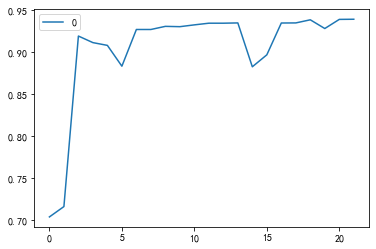

In [98]:
rank = [
    0.70387718, 0.71620665, 0.91942956, 0.91160398, 0.90830749, 0.88349596,
    0.92724778, 0.92724778, 0.93098124, 0.93059653, 0.93274964, 0.93473540,
    0.93473540, 0.93507051, 0.88280224, 0.89704597, 0.93496533, 0.93507051,
    0.93878203, 0.92839708, 0.93927500, 0.93945472
]
rank = pd.DataFrame(rank)
sns.lineplot(data=rank)